In [1]:
import os
import glob
import shutil
from pathlib import Path
from IPython.display import Image, display, HTML
from base64 import b64encode

In [2]:
HOME = os.getcwd()
print(f"Current working directory: {HOME}")

Current working directory: c:\Users\tusha\OneDrive\Desktop\rg


In [4]:
%cd ultralytics
!pip install -e .

c:\Users\tusha\OneDrive\Desktop\rg\ultralytics
Obtaining file:///C:/Users/tusha/OneDrive/Desktop/rg/ultralytics
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ------ --------------------------------- 2.1/12.6 MB 14.4 MB/s eta 0:00:01
   -------------------------- ------------- 8.4/12.6 MB 24.0 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 22.6 MB/s eta 0:00:00
  Building editable for ultralytics (pyproject.toml): started
  Building editable for u

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.41.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.


In [5]:
import ultralytics
print(f"Ultralytics version: {ultralytics.__version__}")
ultralytics.checks()

ModuleNotFoundError: No module named 'torch'

In [6]:
WORK_DIR = r'C:\Users\tusha\OneDrive\Desktop\rg\ultralytics'
%cd {WORK_DIR}

C:\Users\tusha\OneDrive\Desktop\rg\ultralytics


In [7]:
!pip install roboflow


In [8]:
from roboflow import Roboflow


In [9]:
rf = Roboflow(api_key="AjIGZ2OMOJzu8TYy6WUJ")
project = rf.workspace("sohan10012").project("tld-2025-cszo1")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to TLD-2025-1 in yolov8:: 100%|██████████| 2010/2010 [00:02<00:00, 814.85it/s] 


In [10]:
print(f"Dataset downloaded to: {dataset.location}")

Dataset downloaded to: C:\Users\tusha\OneDrive\Desktop\rg\ultralytics\TLD-2025-1


In [11]:
%cd {dataset.location}
!ls -la

C:\Users\tusha\OneDrive\Desktop\rg\ultralytics\TLD-2025-1


'ls' is not recognized as an internal or external command,
operable program or batch file.



=== Dataset Preview ===
Found 699 training images

Sample Image 1:


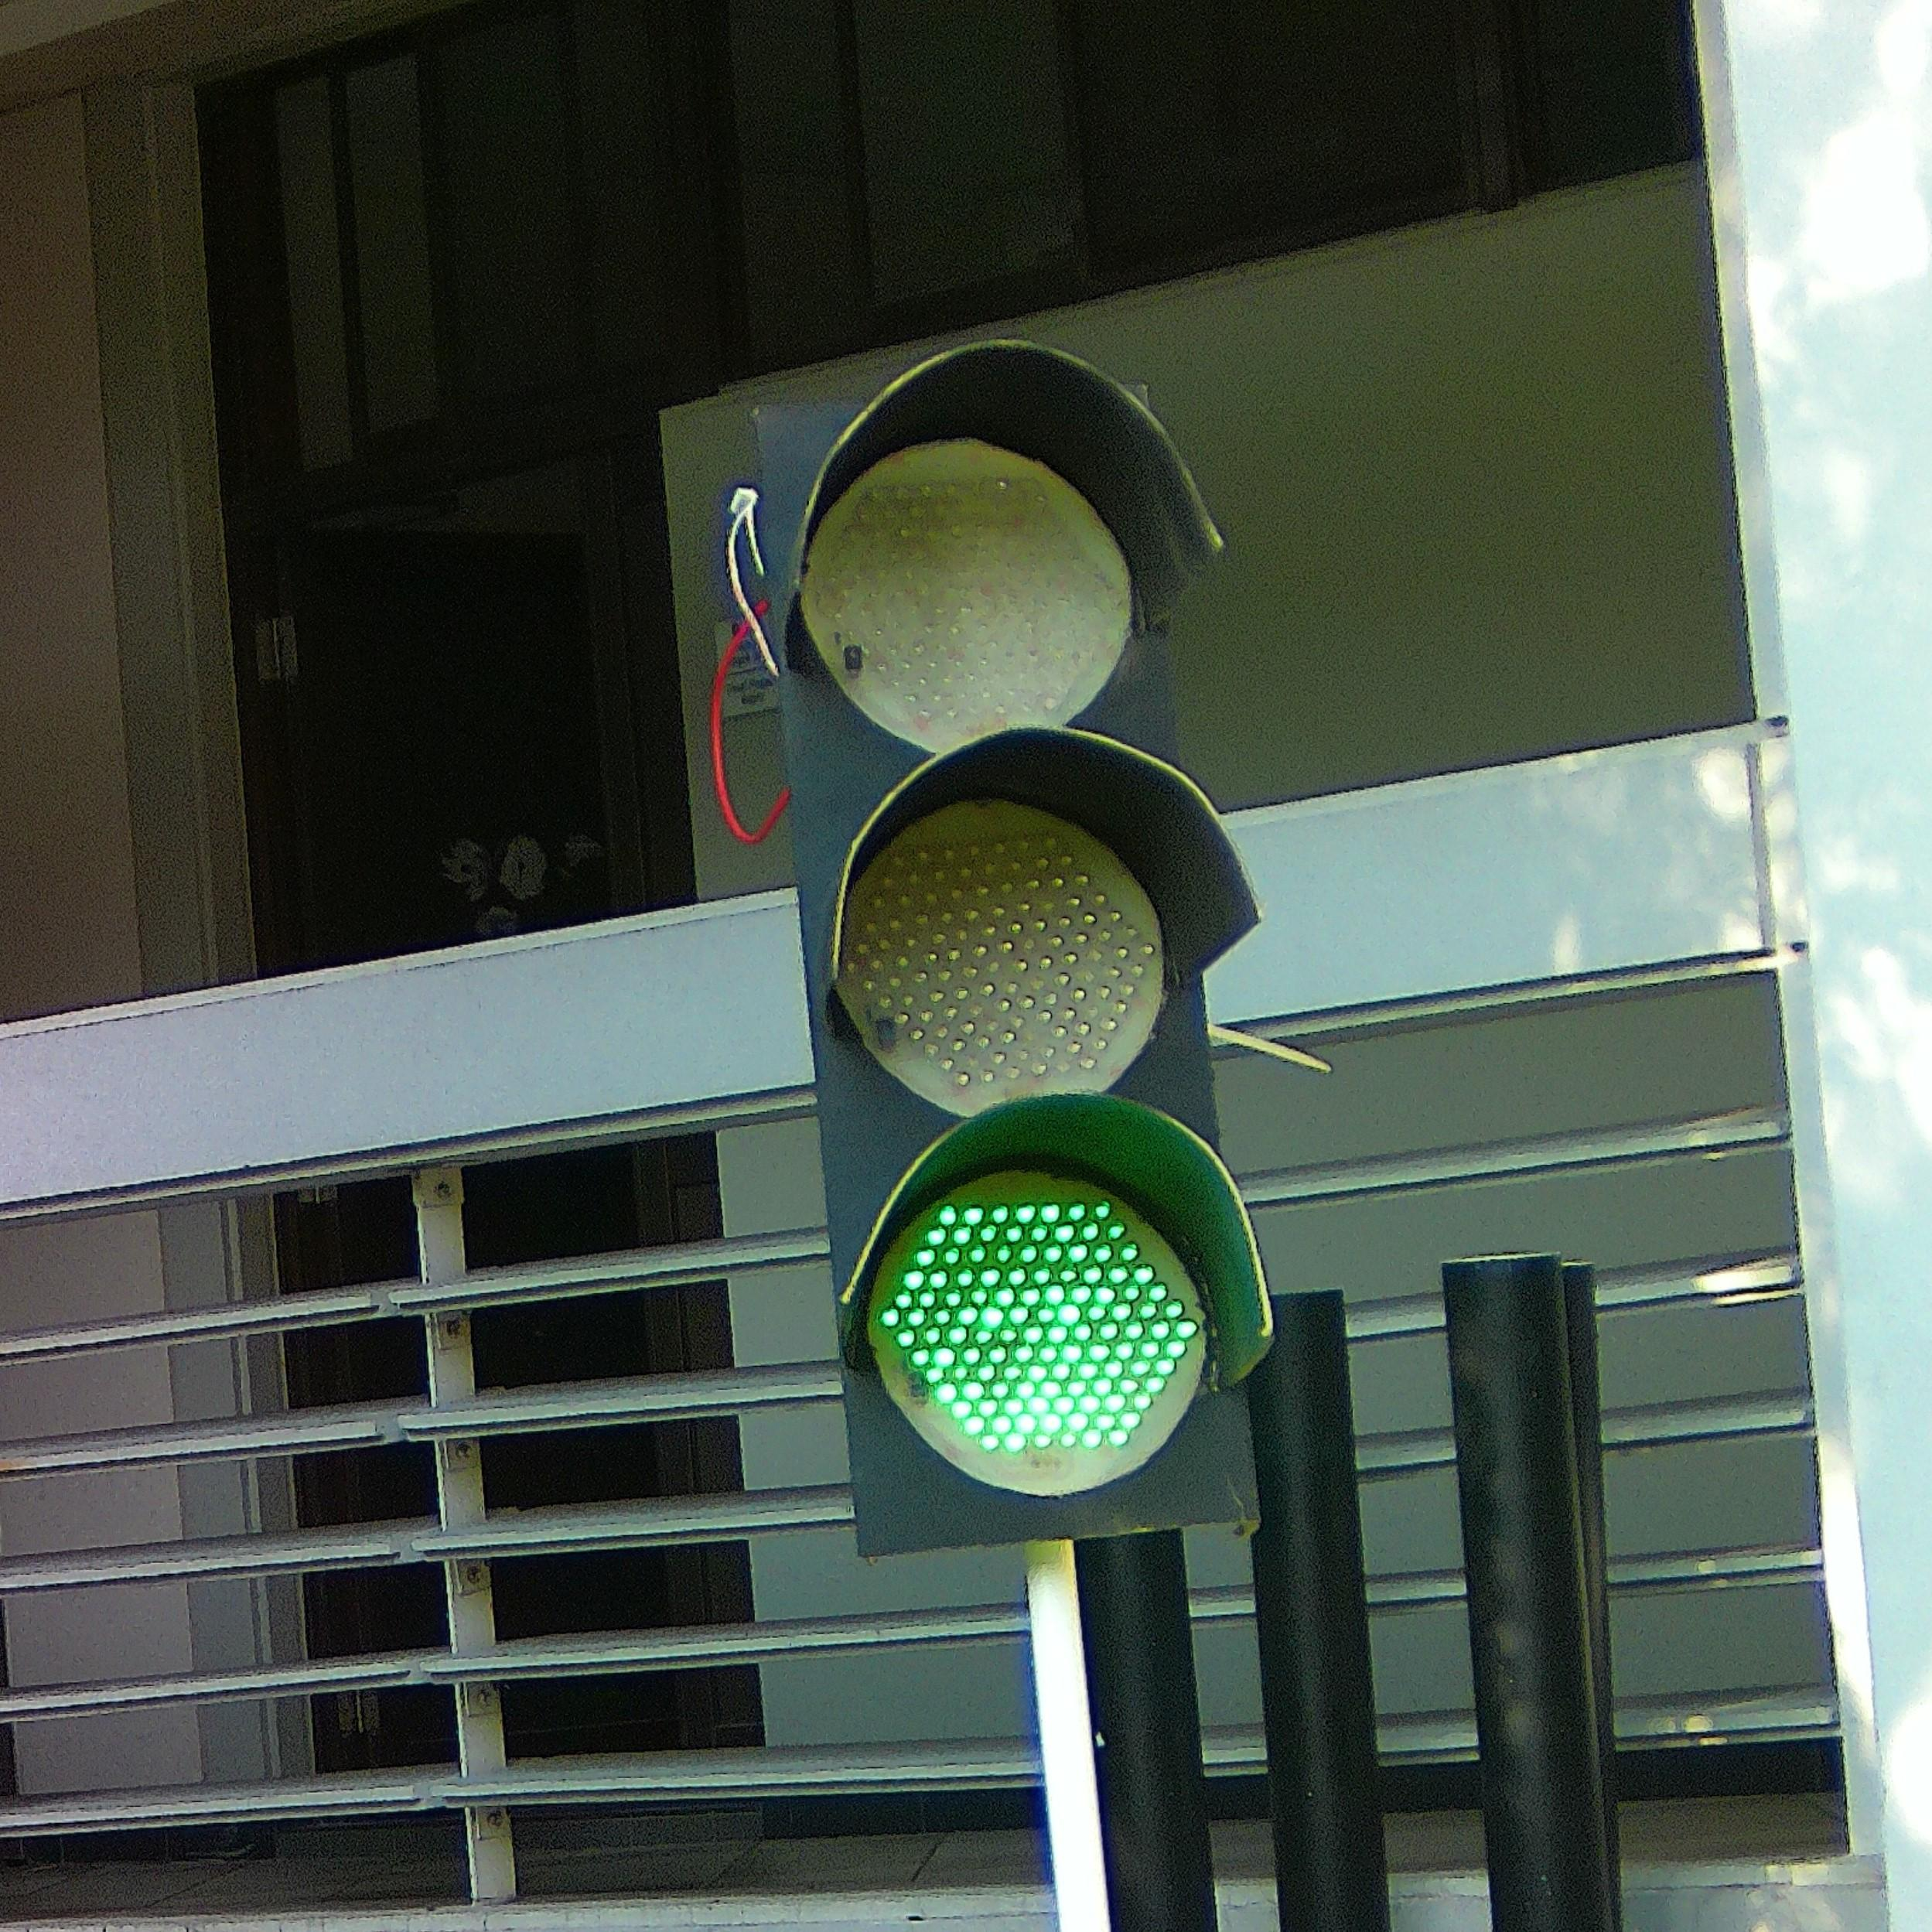


Sample Image 2:


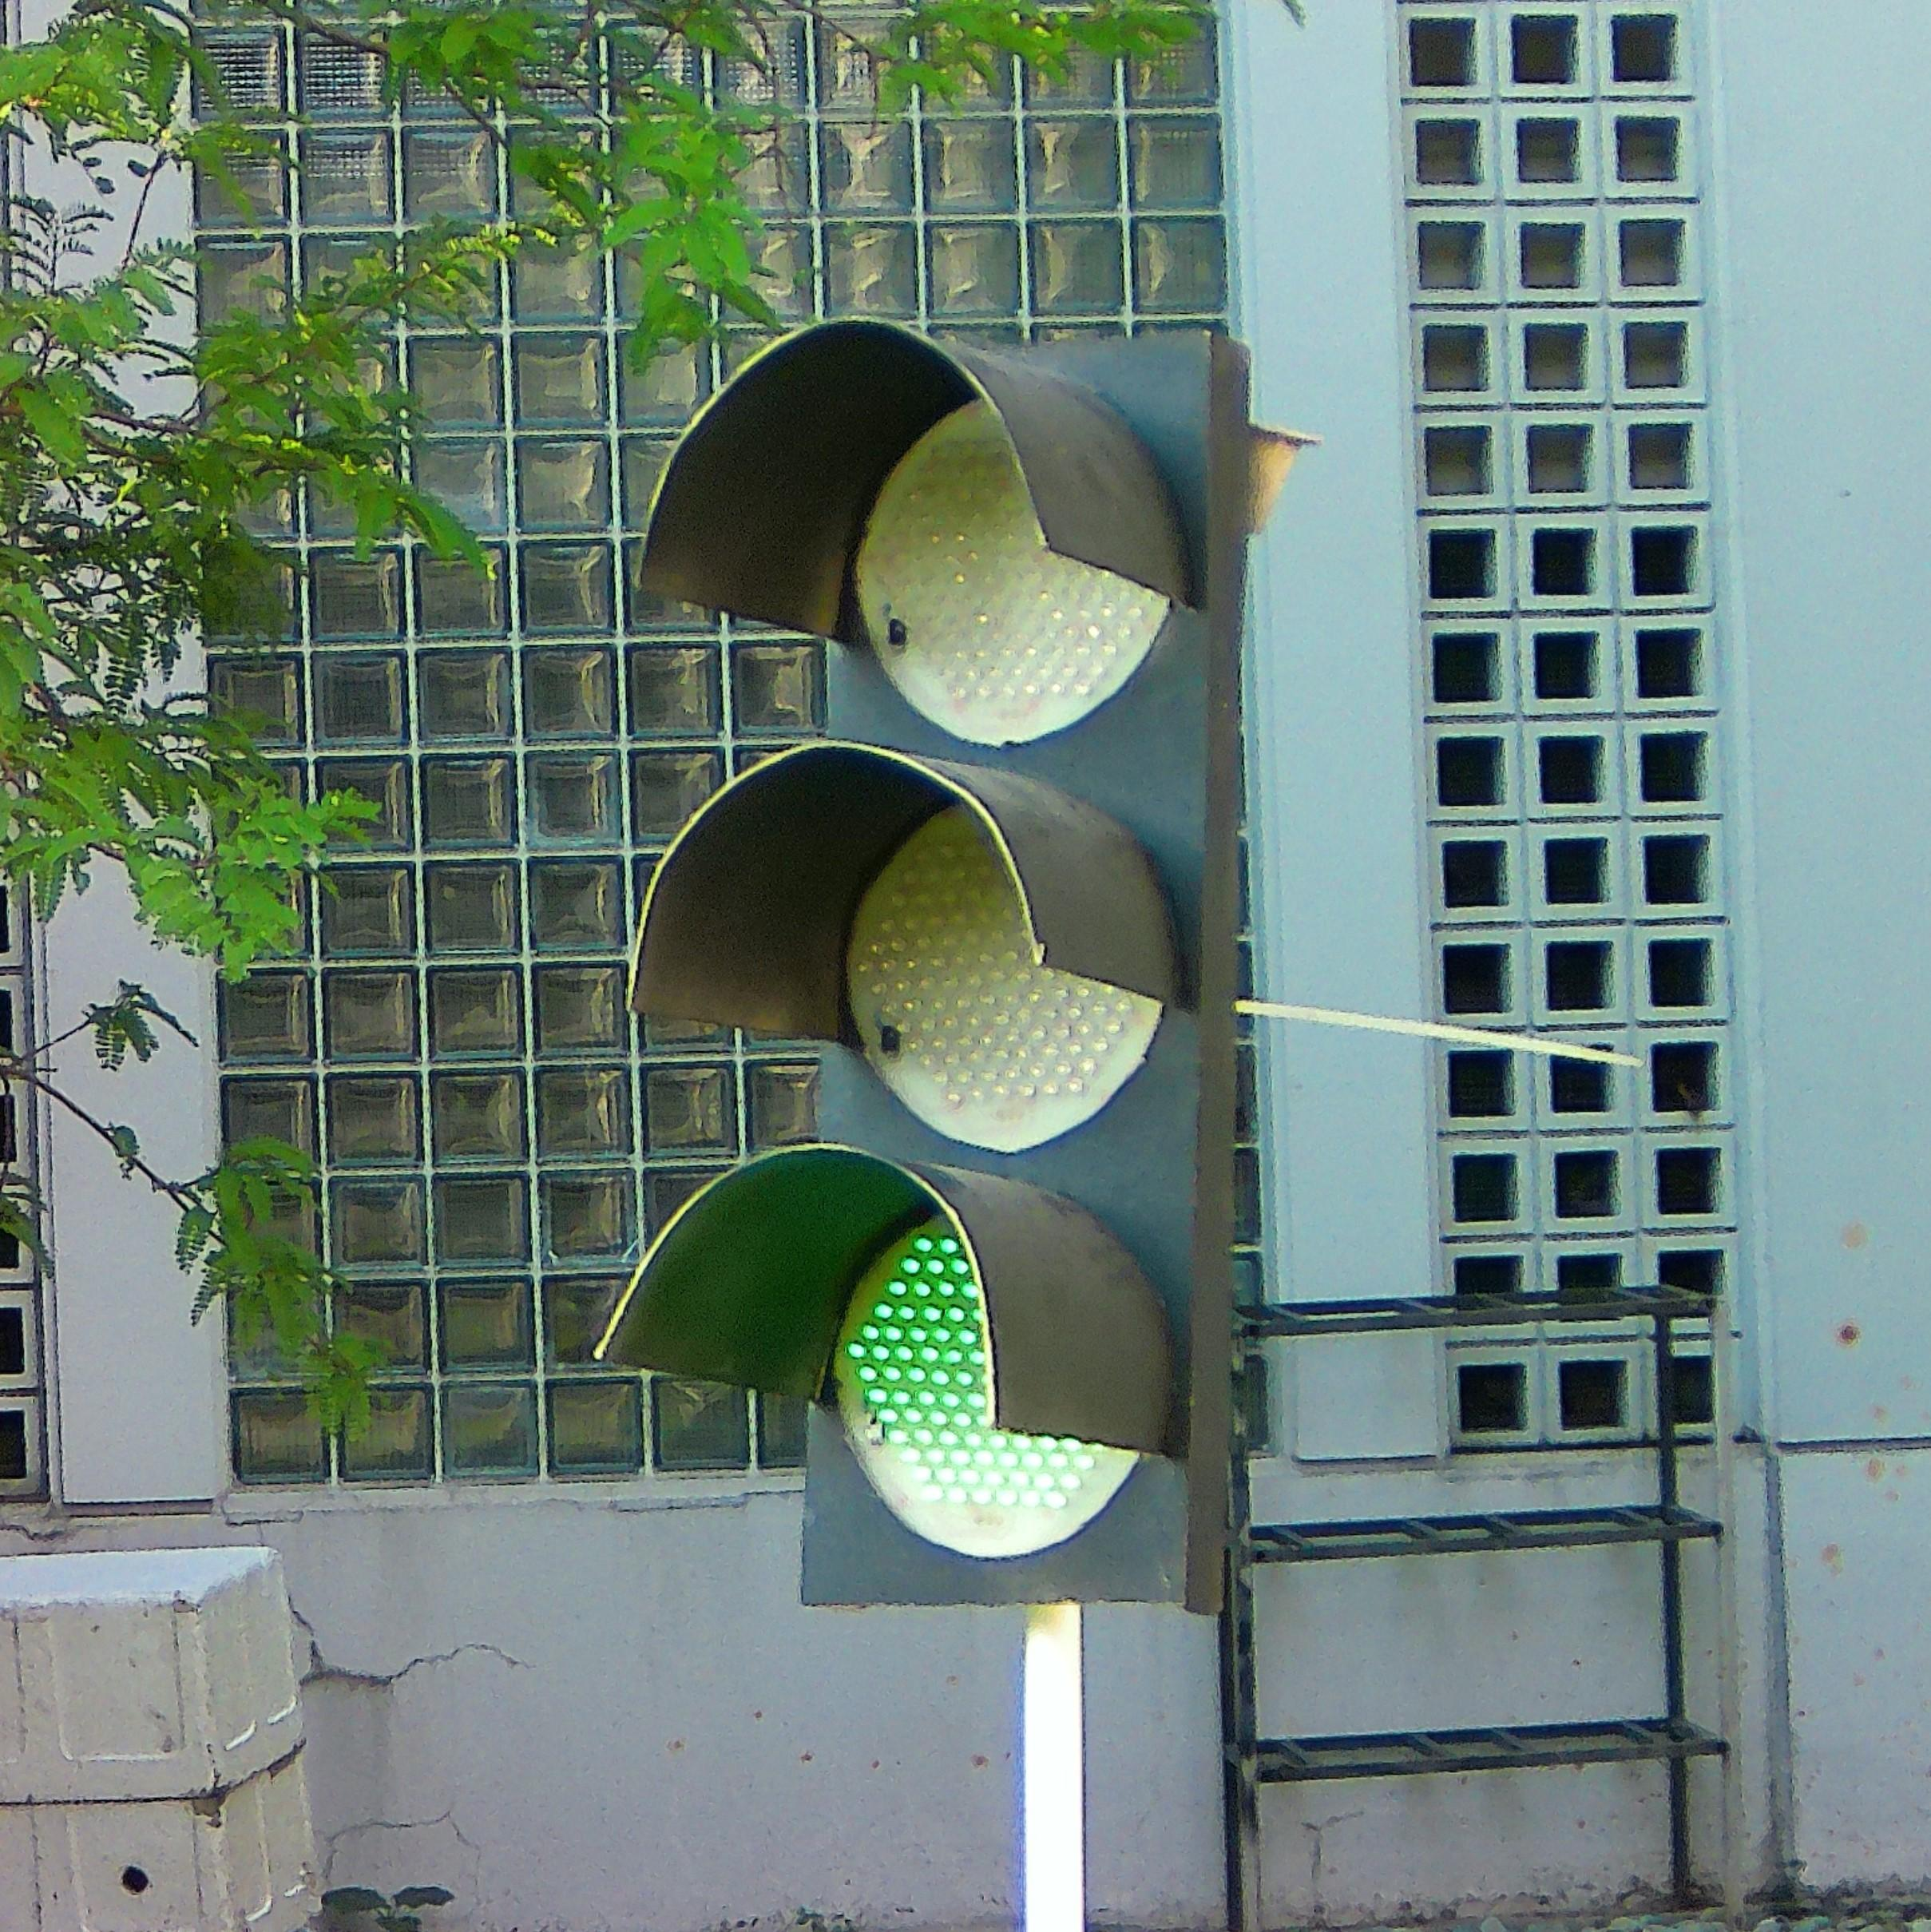


Sample Image 3:


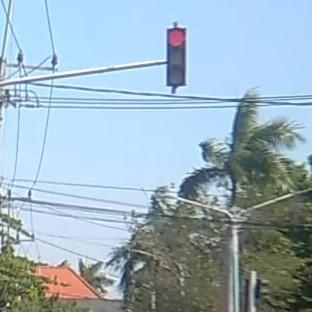

In [12]:
print("\n=== Dataset Preview ===")
train_images = glob.glob("train/images/*.jpg") + glob.glob("train/images/*.png")
if train_images:
    print(f"Found {len(train_images)} training images")
    # Display first 3 training images
    for i, img_path in enumerate(train_images[:3]):
        print(f"\nSample Image {i+1}:")
        display(Image(filename=img_path, width=400))
else:
    print("No training images found!")

In [13]:
%cd {WORK_DIR}

C:\Users\tusha\OneDrive\Desktop\rg\ultralytics


In [41]:
training_command = f"""
yolo detect train \
    model=yolo11l.pt \
    data={dataset.location}/data.yaml \
    epochs=100 \
    imgsz=640 \
    batch=16 \
    lr0=0.01 \
    lrf=0.1 \
    momentum=0.937 \
    weight_decay=0.0005 \
    warmup_epochs=3 \
    warmup_momentum=0.8 \
    warmup_bias_lr=0.1 \
    box=7.5 \
    cls=0.5 \
    dfl=1.5 \
    pose=12.0 \
    kobj=1.0 \
    label_smoothing=0.0 \
    nbs=64 \
    hsv_h=0.015 \
    hsv_s=0.7 \
    hsv_v=0.4 \
    degrees=0.0 \
    translate=0.1 \
    scale=0.9 \
    shear=0.0 \
    perspective=0.0 \
    flipud=0.0 \
    fliplr=0.5 \
    mosaic=1.0 \
    mixup=0.15 \
    copy_paste=0.3 \
    auto_augment=randaugment \
    erasing=0.4 \
    crop_fraction=1.0 \
    save_period=10 \
    val=True \
    plots=True \
    device=0
"""

!{training_command}

In [ ]:

print("\n=== Model Validation ===")
validation_command = f"""
yolo detect val \
    model=runs/detect/train/weights/best.pt \
    data={dataset.location}/data.yaml \
    imgsz=640 \
    batch=32 \
    conf=0.25 \
    iou=0.6 \
    max_det=300 \
    half=False \
    device=0 \
    dnn=False \
    plots=True \
    save_json=True
"""

!{validation_command}


=== Model Validation ===


In [43]:
print("\n=== Training Results ===")
results_path = "runs/detect/train"
if os.path.exists(f"{results_path}/results.png"):
    display(Image(filename=f"{results_path}/results.png", width=800))
if os.path.exists(f"{results_path}/confusion_matrix.png"):
    print("\nConfusion Matrix:")
    display(Image(filename=f"{results_path}/confusion_matrix.png", width=600))


=== Training Results ===


In [44]:
print("\n=== Test Predictions on Validation Set ===")
test_command = f"""
yolo detect predict \
    model=runs/detect/train/weights/best.pt \
    source={dataset.location}/test/images \
    imgsz=640 \
    conf=0.25 \
    iou=0.45 \
    max_det=300 \
    save=True \
    save_txt=True \
    save_conf=True \
    show_labels=True \
    show_conf=True \
    line_width=2
"""

!{test_command}


=== Test Predictions on Validation Set ===


In [ ]:
print("\n=== Prediction Results on Test Images ===")
pred_images = glob.glob("runs/detect/predict*/*.jpg")
if pred_images:
    for i, img_path in enumerate(pred_images[:5]):
        print(f"\nPrediction Result {i+1}:")
        display(Image(filename=img_path, width=600))
else:
    print("No prediction images found!")


=== Prediction Results on Test Images ===
No prediction images found!
